<a href="https://colab.research.google.com/github/ikhlas15/ATHENS-AI-Medical-Imaging/blob/main/H01_modalities_and_io_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 01: Introduction to Medical Imaging Modalities and Data I/O**

### **Course**: Artificial Intelligence in Medical Imaging: From Fundamentals to Applications

***

## **1. Introduction**

Welcome to your second hands-on session! Now that we have our environment set up for reproducible research, it's time to get our hands on actual medical imaging data.

In this notebook, we will explore the most common **imaging modalities** used in hospitals and learn how to load, inspect, and visualize their data using Python. This is a crucial first step before we can begin to build any AI models.

#### **What you will learn today:**
*   The fundamental differences between key imaging modalities like X-ray, CT, and MRI.
*   The importance of specialized file formats like **DICOM** and **NIfTI**.
*   How to use the `pydicom` library to read Ds*   How to use the `nibabel` library to load and visualize 3D medical volumes (like an MRI scan).
*   The concept of Hounsfield Units (HU) in CT scans and how to apply them.

***

## **2. A Quick Tour of Medical Imaging Modalities**

A "modality" refers to a specific method of acquiring an image. Each one uses different physics and is suited for visualizing different types of tissue or pathology.

| Modality | Abbreviation | How it Works | Best For Viewing | Key Characteristics |
| :--- | :--- | :--- | :--- | :--- |
| **X-ray** | XR / CR | Passes X-ray radiation through the body to create a 2D projection image. | Bones, chest (lungs, heart). | 2D, grayscale, fast, and low-cost. Dense tissues (like bone) appear white. |
| **Computed Tomography** | CT | Acquires a series of X-ray images from many angles and reconstructs them into a 3D volume. | Bones, lungs, blood vessels, and cancer detection. Excellent for detailed cross-sectional anatomy. | 3D volumes. Pixel values are in **Hounsfield Units (HU)**, a standardized scale. |
| **Magnetic Resonance Imaging** | MRI | Uses strong magnetic fields and radio waves to generate detailed images of the body's soft tissues. | Soft tissues like the brain, muscles, ligaments, and tumors. | 3D volumes with high contrast for soft tissues. No radiation. Has different sequences (T1, T2, FLAIR) that highlight different tissue properties. |
| **Ultrasound** | US | Uses high-frequency sound waves and measures their echoes to create real-time images. | Fetal imaging, heart, and abdominal organs. | 2D or 3D, real-time, no radiation. Image quality is highly operator-dependent. |

***

## **3. Specialized File Formats: DICOM and NIfTI**

Unlike a standard photo (like a JPEG or PNG), medical images are paired with a large amount of critical metadata.

*   **DICOM (Digital Imaging and Communications in Medicine):** This is the universal standard. A single DICOM file contains not just the pixel data but also a header with patient information, scanner settings, image dimensions, pixel spacing, and much more. **In AI, this metadata is often as important as the image itself.**
*   **NIfTI (Neuroimaging Informatics Technology Initiative):** This format is simpler than DICOM and is very popular in the research community, especially for MRI and CT data. It stores a 3D or 4D data block along with important spatial information (like voxel size and orientation).

***

## **4. Step 1: Installing Necessary Libraries**

We'll need two specialized libraries for this notebook: `pydicom` for handling DICOM files and `nibabel` for NIfTI files. Let's install them.


In [ ]:
# Use pip, Python's package installer, to add the libraries to our Colab environment.
# The '!' symbol lets us run shell commands directly in the notebook.
#TODO: Install nibabel
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.8 MB/s eta 0:00:00


***

## **5. Step 2: Working with DICOM Files**

Let's explore a DICOM file. We will use `pydicom` to read a sample CT image that comes with the library.

### **Loading and Inspecting a DICOM File**
The `pydicom.dcmread()` function loads a DICOM file into a `FileDataset` object, which holds both the pixel data and the metadata.

In [ ]:
import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt

# get_testdata_file provides a path to a sample DICOM file
#TODO: Use get_testdata_file to obtain the path to "CT_small.dcm"
dicom_file_path =

# TODO: Load the DICOM file
dicom_data =

# You can print the object to see a summary of all its metadata!
print(dicom_data)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002,0013) Implementation Version Name         SH: 'DCTOOL100'
(0002,0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0012) Instance Creation Date              DA: '20040119'
(0008,0013) Instance Creation Time              TM: '072731'
(0008,0014) Instance Creator UID                UI: 1.3.6.1.4.

### **Accessing Pixel Data and Metadata**
The pixel data is stored in the `pixel_array` attribute. The metadata is accessible as attributes of the `dicom_data` object.

The shape of the image is: (128, 128)
--------------------
Modality: CT
Patient's Name: CompressedSamples^CT1
Study Date: 20040119
Pixel Spacing (x, y) in mm: [0.661468, 0.661468]
Slice Thickness in mm: 5.000000


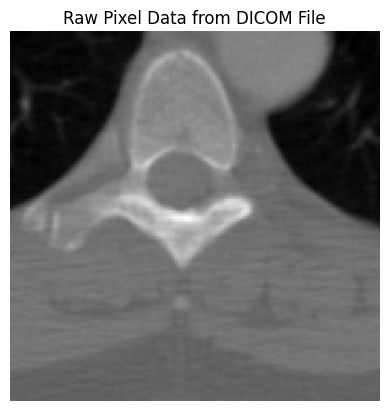

In [ ]:
# Access the pixel data as a NumPy array
#TODO: Fill the holes
image_pixels = dicom_data.pixel_array
print(f"The shape of the image is: {}")

# Access some key metadata fields
print("-" * 20)
print(f"Modality: {}")
print(f"Patient's Name: {}")
print(f"Study Date: {}")

# Pixel Spacing (mm per pixel) is crucial for real-world measurements
print(f"Pixel Spacing (x, y) in mm: {}")
print(f"Slice Thickness in mm: {}")

# Display the image using matplotlib
plt.imshow(, cmap=plt.cm.gray)
plt.title("Raw Pixel Data from DICOM File")
plt.axis('off')
plt.show()

In [ ]:
print(len(dir(dicom_data)),dir(dicom_data))

200 ['AccessionNumber', 'AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime', 'ContrastBolusAgent', 'ContrastBolusRoute', 'ConvolutionKernel', 'DataCollectionDiameter', 'DataSetTrailingPadding', 'DistanceSourceToDetector', 'DistanceSourceToPatient', 'Exposure', 'ExposureTime', 'FilterType', 'FocalSpots', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'HighBit', 'ImageComments', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceCreatorUID', 'InstanceNumber', 'InstitutionName', 'KVP', 'Laterality', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OtherPatientIDsSequence', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PatientWeight', 'PhotometricInterpretation', 'PixelData', 'PixelPaddingValue', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndicator', 

### **Understanding Hounsfield Units (HU)**
In their raw form, the pixel values in a CT scan don't have a standard physical meaning. To standardize them, we convert them to **Hounsfield Units (HU)**. This scale relates pixel values to the radiodensity of the tissue.

*   **Air:** approximately -1000 HU (black)
*   **Fat:** -100 to -50 HU
*   **Water:** 0 HU
*   **Soft Tissue:** +20 to +100 HU
*   **Bone:** +700 to +3000 HU (white)

The conversion formula is: `HU = pixel_value * RescaleSlope + RescaleIntercept`. The slope and intercept values are stored in the DICOM metadata.

In [ ]:
# TODO: Apply the conversion to Hounsfield Units
hu_image =

print(f"Rescale Slope: {}")
print(f"Rescale Intercept: {}")
print("-" * 20)
print(f"Image intensity range (raw): {image_pixels.min()} to {image_pixels.max()}")
print(f"Image intensity range (HU): {} to {}")

# Display the image in HU
plt.imshow(, cmap=plt.cm.gray)
plt.title("CT Image in Hounsfield Units (HU)")
plt.colorbar(label="Hounsfield Units (HU)")
plt.axis('off')
plt.show()

***

## **6. Step 3: Working with 3D NIfTI Volumes**

Now let's move from a single 2D slice to a full 3D volume using the NIfTI format and the `nibabel` library. We will download a sample T1-weighted MRI of a brain.

### **Loading and Inspecting a NIfTI File**

In [ ]:
import nibabel as nib
import numpy as np
import urllib.request #lets us download a file from the internet (a sample MRI scan)

# Download a sample MRI scan from the web
# 'https://www.nitrc.org/frs/download.php/4117/avg152T1_RL_nifti.nii.gz'
url = "https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/8d0dab13-b69b-48fa-89ef-cb266e1b3686"
nifti_path = 'sample_mri.nii.gz'
urllib.request.urlretrieve(url, nifti_path)
print(f"Downloaded sample MRI scan to {nifti_path}")

# Load the NIfTI file
nifti_image = nib.load(nifti_path)

# Get the image data as a NumPy array
# This is our 3D volume!
volume_data = nifti_image.get_fdata()

print(f"Shape of the 3D volume (X, Y, Z): {}")

# The header contains important spatial information
header =
# Extract the voxel dimensions from the header (x,y,z)
voxel_dims = .get_zooms()
print(f"Voxel dimensions (size of one voxel in mm): {}")

### **Visualizing a 3D Volume**
You can't display a 3D volume directly on a 2D screen. Instead, we visualize it by looking at 2D slices from different anatomical planes:

*   **Axial:** Slices from top to bottom (like floors in a building).
*   **Coronal:** Slices from front to back.
*   **Sagittal:** Slices from left to right.

In [ ]:
# Function to show slices
def show_slices(slices):
  #TODO: create one row of plots
    fig, axes =
    for i, slice in enumerate(slices):
        #TODO: you need to transpose the slide because MRI slices are rotated
        axes[i].imshow(, cmap="gray", origin="lower")
        # Hide the axes


# Let's get the middle slice from dimension x
mid_x = volume_data.shape[0] // 2
# TODO: Find the middle slice along other axes
mid_y =
mid_z =

slice_0 = volume_data[mid_x, :, :]  # Sagittal plane
slice_1 =  # Coronal plane
slice_2 =  # Axial plane

# Display the slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(np.rot90(slice_0), cmap="gray")
axes[0].set_title("Sagittal Slice")
axes[0].axis('off')
#TODO: Display the other slices

plt.suptitle("Three Orthogonal Views of the MRI Volume")
plt.show()

***

## **Summary and Next Steps**

In this notebook, you have taken your first steps into the world of medical image data. You have learned:
*   The key differences between major imaging modalities.
*   How to load DICOM files, inspect their rich metadata, and convert CT scans to Hounsfield Units.
*   How to load 3D NIfTI volumes and visualize them as 2D slices from different anatomical planes.

This foundational knowledge is essential. In our next notebook, **`02_image_ops_from_scratch.ipynb`**, we will start manipulating these images, learning fundamental image processing operations like filtering and edge detection from first principles.